In [1]:
import re, string,os
from glob import glob as gb
import pandas as pd
from collections import Counter
from tqdm import tqdm
from nltk.corpus import stopwords
from functions import *

plotting.style_('Paired',n_var=12)

In [2]:
base_path = "/home/ruben/Documents/GitHub/ParlaMintCase"

In [3]:
tf = pd.read_csv(base_path + '/resources/keywords-corona-translation.csv')
tf_corona = {language:dict(zip(tf[tf['language'] == language]['word'],tf[tf['language'] == language]['translation'])) for language in list(set(tf['language']))}

tf = pd.read_csv(base_path + '/resources/keywords-expertise-translation.csv')
tf_science = {language:dict(zip(tf[tf['language'] == language]['word'],tf[tf['language'] == language]['translation'])) for language in list(set(tf['language']))}
tf_science = {k:{x:i for x,i in v.items() if x not in ["policy","program","measures"]} for k,v in tf_science.items()}

In [4]:
def plot_words(language='',words=[],start_month='2020-01',end_month='2020-12',chamber='',normalized=False,save=('',False),**kwargs1):
    # Kwargs1 for plotting the bars

    data = data_loader.period(language=language,data_version="lemmatized",start_date=start_month,end_date=end_month)
    data = utils.add_metadata(data,language)

    if chamber != '':
        data = data[data.term.astype(str).str.contains(chamber)].reset_index(drop=True)

    total_data = pd.read_csv(os.path.join(base_path,"resources/totals",f"{language}-total-tokens.csv"))
    total_data = pd.Series(total_data.n.values,index=total_data.month).to_dict()

    freq_data = frequency.information(data,words,exact_match=True,period_format="month")
    d = frequency.distribution(freq_data,metadata_selectors=[])
    d.columns = [x.replace('_hits','') for x in d.columns]

    for c in list(d.columns)[1:]:
        if d[c].sum() == 0:
            d = d.drop(c,axis=1)

    if normalized == True:
        for c in list(d.columns)[1:]:
            d[c] = [x / total_data[d['date'][c]] if total_data[d['date'][c]] != 0 else x for c,x in enumerate(d[c])]
            lab = "Rel"
    else:
        lab = "Abs"
    
    p = d.plot.bar(x='date',y=list(d.columns)[1:],**kwargs1)
    lgd = plt.legend(list(d.columns)[1:],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Months')
    plt.ylabel(lab + ". Frequency")
    if save[1] == True: 
        fig = p.get_figure()
        fig.savefig(save[0],dpi=350, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close()


pl lower
looking for data in  /media/ruben/Elements/ParlaMint/pl/pl-ana-txt/
found 81 files


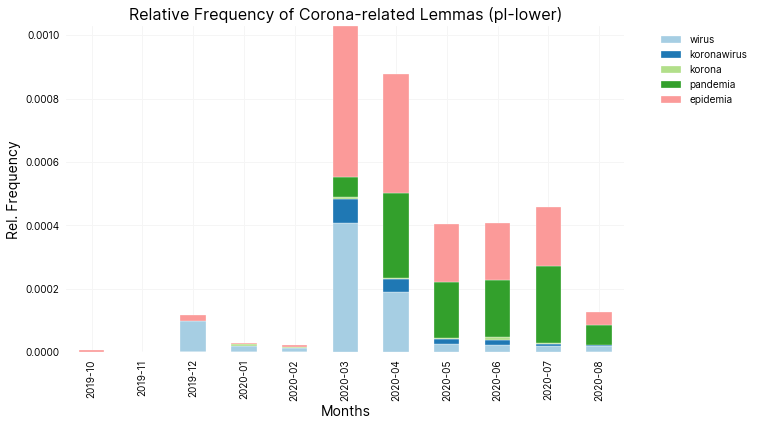

pl upper
looking for data in  /media/ruben/Elements/ParlaMint/pl/pl-ana-txt/
found 81 files


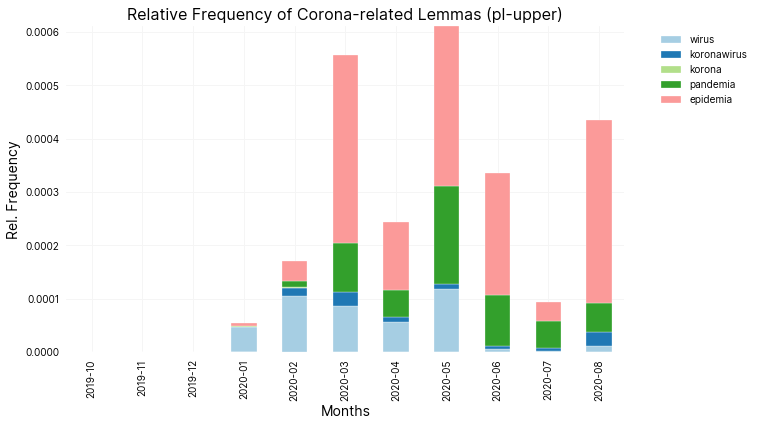

bg 
looking for data in  /media/ruben/Elements/ParlaMint/bg/bg-ana-txt/
found 105 files


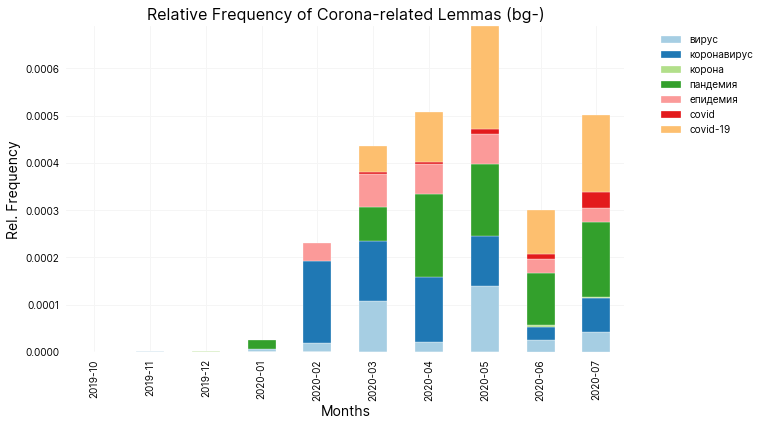

si lower
looking for data in  /media/ruben/Elements/ParlaMint/si/si-ana-txt/
found 56 files
no numeric data to plot
si upper
looking for data in  /media/ruben/Elements/ParlaMint/si/si-ana-txt/
found 56 files
no numeric data to plot
nl lower
looking for data in  /media/ruben/Elements/ParlaMint/nl/nl-ana-txt/
found 848 files


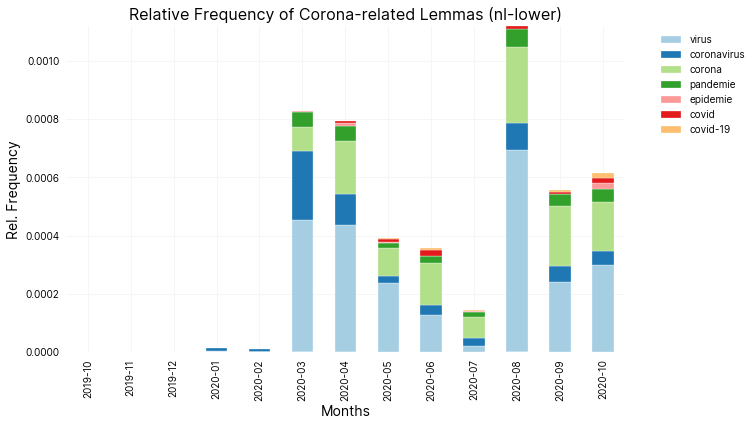

nl upper
looking for data in  /media/ruben/Elements/ParlaMint/nl/nl-ana-txt/
found 848 files


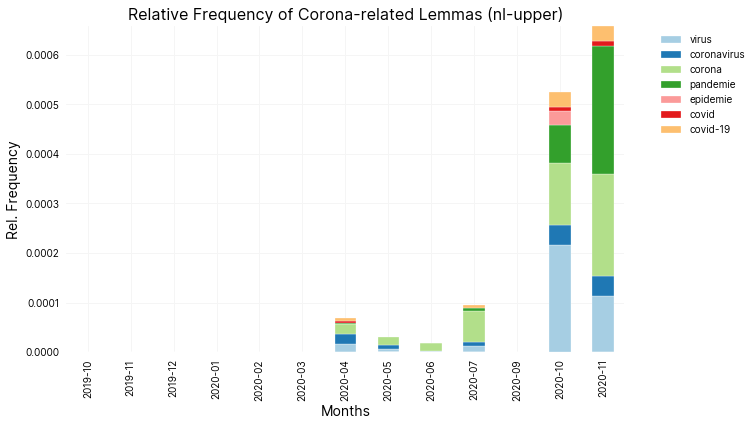

it lower
looking for data in  /media/ruben/Elements/ParlaMint/it/it-ana-txt/
found 125 files
no numeric data to plot
it upper
looking for data in  /media/ruben/Elements/ParlaMint/it/it-ana-txt/
found 125 files


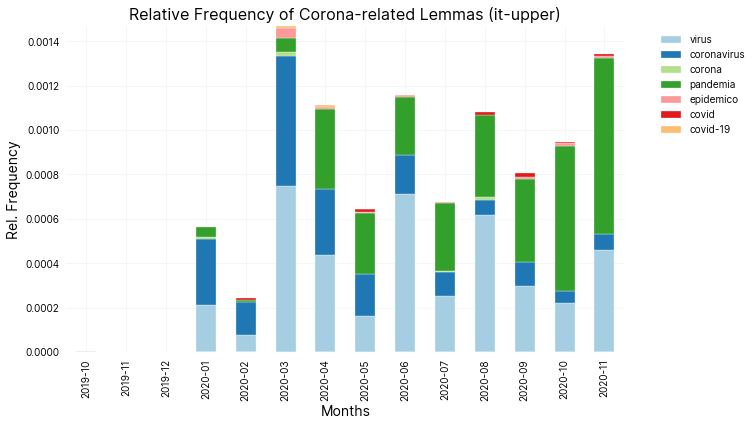

In [6]:
## Plot CoronaWords
chamber_d = {"pl":["lower","upper"],"bg":[''],"si":["lower","upper"],"nl":["lower","upper"],"it":["lower","upper"]}

for language in 'pl bg si nl it'.split(' '):

    for chamber in chamber_d[language]:
        try:
            print(language,chamber)
            plotting_args = {"stacked":True,
                            "figsize":(10,6),
                            "title":f"Relative Frequency of Corona-related Lemmas ({language}-{chamber})"}

            plot_words(language=language,
                        words=list(tf_corona[language].values()),
                        start_month="2019-10",
                        end_month="2020-12",
                        chamber=chamber,
                        normalized=True,
                        save=(f'{base_path}/results/plots/frequencies/coronawords-{language}-{chamber}-freq.png',True),
                        **plotting_args)
        except Exception as e:
            print(e)
            continue

pl lower
looking for data in  /media/ruben/Elements/ParlaMint/pl/pl-ana-txt/
found 75 files


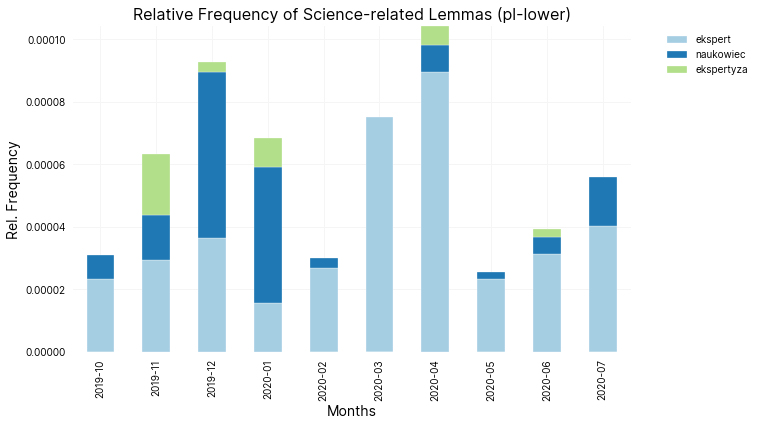

pl upper
looking for data in  /media/ruben/Elements/ParlaMint/pl/pl-ana-txt/
found 75 files


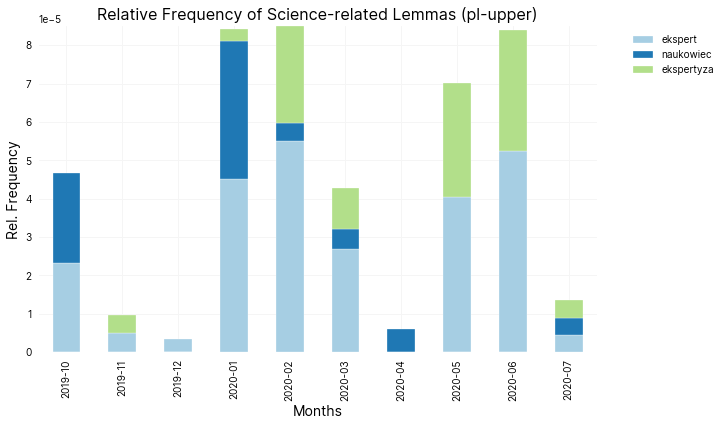

bg 
looking for data in  /media/ruben/Elements/ParlaMint/bg/bg-ana-txt/
found 105 files


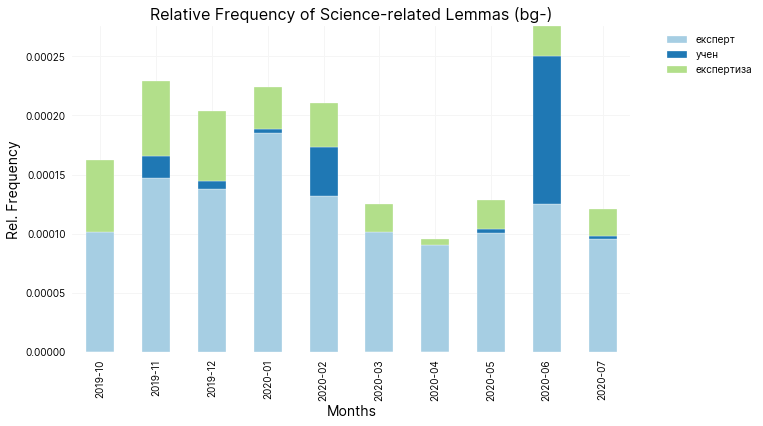

si lower
looking for data in  /media/ruben/Elements/ParlaMint/si/si-ana-txt/
found 56 files
no numeric data to plot
si upper
looking for data in  /media/ruben/Elements/ParlaMint/si/si-ana-txt/
found 56 files
no numeric data to plot
nl lower
looking for data in  /media/ruben/Elements/ParlaMint/nl/nl-ana-txt/
found 717 files


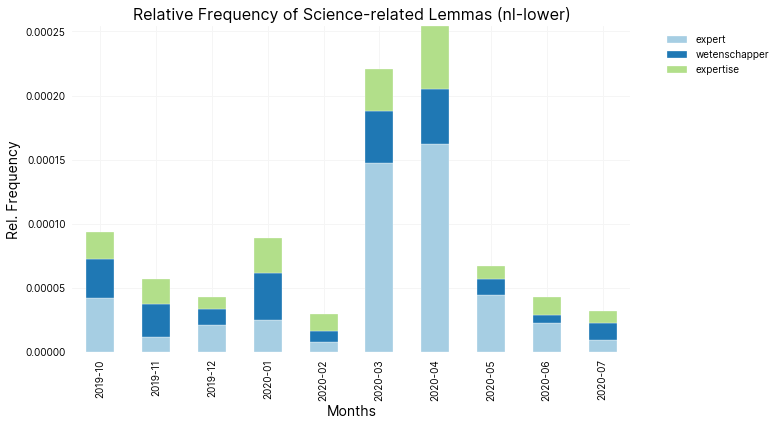

nl upper
looking for data in  /media/ruben/Elements/ParlaMint/nl/nl-ana-txt/
found 717 files


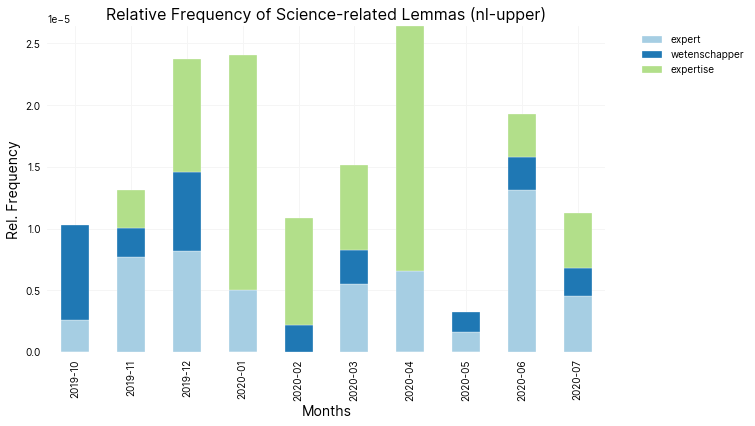

it lower
looking for data in  /media/ruben/Elements/ParlaMint/it/it-ana-txt/
found 96 files
no numeric data to plot
it upper
looking for data in  /media/ruben/Elements/ParlaMint/it/it-ana-txt/
found 96 files


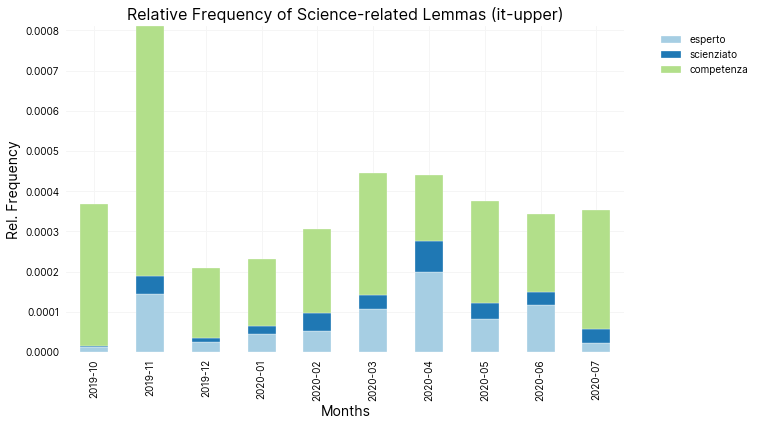

In [8]:
## Plot Sciencewords
chamber_d = {"pl":["lower","upper"],"bg":[''],"si":["lower","upper"],"nl":["lower","upper"],"it":["lower","upper"]}

for language in 'pl bg si nl it'.split(' '):

    for chamber in chamber_d[language]:
        try:
            print(language,chamber)
            plotting_args = {"stacked":True,
                            "figsize":(10,6),
                            "title":f"Relative Frequency of Science-related Lemmas ({language}-{chamber})"}

            plot_words(language=language,
                        words=[v for k,v in tf_science[language].items() if k not in ['knowledge','information','science']],
                        start_month="2019-10",
                        end_month="2020-08",
                        chamber=chamber,
                        normalized=True,
                        save=(f'{base_path}/results/plots/frequencies/sciencewords-{language}-{chamber}-freq.png',True),
                        **plotting_args)
        except Exception as e:
            print(e)
            continue